In [1]:
using Distributions
using PyPlot
srand(42);

In [14]:
function MetropolisHastings(K, Π, γ, x₀)
    X = zeros(K, 2)
    w = MvNormal(γ^2*eye(2))
    x = x₀
    accepted = 0
    for k=1:K
        y = x + rand(w)

        if rand() < min(1, Π(y) / Π(x))
            x = y
            accepted += 1
        end
        X[k, :] = x
    end
    X, accepted
end

MetropolisHastings (generic function with 2 methods)

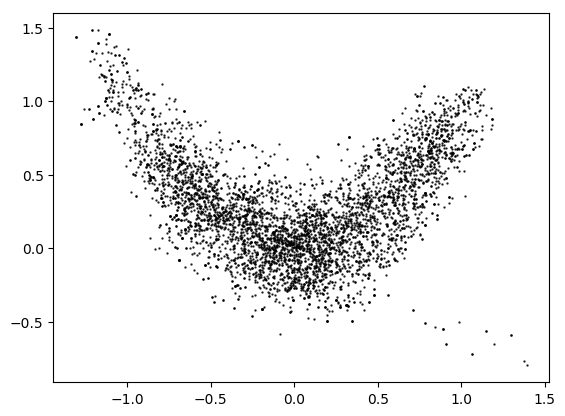

PyObject <matplotlib.collections.PathCollection object at 0x7fde194e6710>

In [44]:
K = 5000
Π = x -> exp(-10*(x[1]^2 - x[2])^2 - (x[2] - 0.25)^4)

X, _ = MetropolisHastings(K, Π, 0.1, [1.5; -0.8])
scatter(X[:,1], X[:,2], s=0.5, alpha=0.8, c="black")

In [5]:
for γ = [1, 0.1, 0.05, 0.01]
    _, accepted = MetropolisHastings(K, Π, γ)
    println("γ=",γ, ", accepted=", 100*accepted/K, "%")
end

γ=1.0, accepted=15.8%
γ=0.1, accepted=78.86%
γ=0.05, accepted=90.26%
γ=0.01, accepted=95.82%


In [122]:
model = m -> x -> m[1] * x + m[2];
real_parameters = [ 1, 0 ];
X = rand(100) * 10
σ = 1
observations = model(real_parameters).(X) + σ*randn(100)
prior = dunif2([0 2; 0 2])
likelihood = m ->
    let
        f = model(m) # the materialized model for given parameters
        d = dnorm(0, σ^2) # here, for sake of simplicity, we already know the variance σ^2 of the error

        # as we assume observations are independent, we can evaluate p(d|m) = Πᵢ p(dᵢ|m)
        l=foldi((i, acc) -> acc + log(d(f(X[i]) - observations[i])), 1, 1:length(X))
        exp(l)
    end
unnormalized_posterior = m -> prior(m) * likelihood(m);


for N = [500; 1000; 5000; 10000; 50000]
    
    M, r = MetropolisHastings(N, unnormalized_posterior, 0.1, x)
    println(ceil(r/N*100), "% (", r, "/", N, ")\tμ = [", mean(M[:,1]), ", ", mean(M[:,2]), "]")
end



23.0% (113/500)	μ = [0.9372281210682957, 0.32338562119047326]
20.0% (194/1000)	μ = [0.9335235393697531, 0.35306983779364304]
22.0% (1073/5000)	μ = [0.941988364573193, 0.32346255594341466]
21.0% (2073/10000)	μ = [0.9421765224428962, 0.32750397988920826]
21.0% (10441/50000)	μ = [0.9434376335911003, 0.32323687901527315]


In [128]:
randn(10, 2)[:,1] + 10


10-element Array{Float64,1}:
  8.77147
 10.6538 
 11.9429 
 10.7115 
  9.77526
 10.7067 
  9.90773
  9.49626
  9.46571
 10.4995 